In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def k1(x, y, G, M):
    return (-G*M*x)/np.power((x**2+y**2), 3/2)

def l1(x, y, G, M):
    return (-G*M*y)/np.power((x**2+y**2), 3/2)

def k2(u, v):
    return u

def l2(u, v):
    return v

In [ ]:
# méthode de Runge-Kutta d'ordre 2
def fct_RK2_2D(x0, y0, x_prime0, y_prime0, tmin, tmax, pas, beta, K1, K2, L1, L2, G, M):
    """
    Implémente la méthode de Runge-Kutta d'ordre 2 pour un système d'équations différentielles en 2D.

    Arguments :
    - x0, y0, x_prime0, y_prime0 : conditions initiales (valeurs de x et y à t = tmin)
    - tmin : début de l'intervalle de temps
    - tmax : fin de l'intervalle de temps
    - pas : pas de discrétisation
    - beta : paramètre de la méthode RK2 (typique : beta=0.5 pour RK classique)
    - K1 : fonction K1(x, y, G, M) définissant l'accélération en x
    - L1 : fonction L1(x, y, G, M) définissant l'accélération en y
    - K2 : fonction K2(u, v) définissant la vitesse en x
    - L2 : fonction L2(u, v) définissant la vitesse en y

    Retourne :
    - x : tableau des valeurs de x(t)
    - y : tableau des valeurs de y(t)
    - t : tableau des instants de temps
    """
    t = np.arange(tmin, tmax+pas, pas)

    # Initialisation des positions et vitesses
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    x[0] = x0
    y[0] = y0

    # Initialisation des vitesses
    u = np.zeros(len(t))
    v = np.zeros(len(t))
    u[0] = x_prime0
    v[0] = y_prime0

    for k in range(1, len(t)):
        # 1. Calculer les accélérations au point actuel
        k1u = K1(x[k-1], y[k-1], G, M)  # Accélération en x
        k1v = L1(x[k-1], y[k-1], G, M)  # Accélération en y

        # 2. Calculer les vitesses au point actuel
        k1x = K2(u[k-1], v[k-1])  # Vitesse en x
        k1y = L2(u[k-1], v[k-1])  # Vitesse en y

        # 3. Calculer les positions et vitesses intermédiaires avec pas/(2*beta)
        x_mid = x[k-1] + (pas/(2*beta))*k1x
        y_mid = y[k-1] + (pas/(2*beta))*k1y
        u_mid = u[k-1] + (pas/(2*beta))*k1u
        v_mid = v[k-1] + (pas/(2*beta))*k1v

        # 4. Calculer les dérivées aux points intermédiaires
        k2u = K1(x_mid, y_mid, G, M)
        k2v = L1(x_mid, y_mid, G, M)
        k2x = K2(u_mid, v_mid)
        k2y = L2(u_mid, v_mid)

        # 5. Mettre à jour les positions et vitesses
        x[k] = x[k-1] + pas*((1-beta)*k1x + beta*k2x)
        y[k] = y[k-1] + pas*((1-beta)*k1y + beta*k2y)
        u[k] = u[k-1] + pas*((1-beta)*k1u + beta*k2u)
        v[k] = v[k-1] + pas*((1-beta)*k1v + beta*k2v)

    return x, y, t, u, v

# méthode de Runge-Kutta d'ordre 4
def fct_RK4_2D(x0, y0, x_prime0, y_prime0, tmin, tmax, pas, beta, K1, K2, L1, L2, G, M):
    """
    Implémente la méthode de Runge-Kutta d'ordre 2 pour un système d'équations différentielles en 2D.

    Arguments :
    - x0, y0, x_prime0, y_prime0 : conditions initiales (valeurs de x et y à t = tmin)
    - tmin : début de l'intervalle de temps
    - tmax : fin de l'intervalle de temps
    - pas : pas de discrétisation
    - beta : paramètre de la méthode RK2 (typique : beta=0.5 pour RK classique)
    - K1 : fonction K1(x, y, G, M) définissant l'accélération en x
    - L1 : fonction L1(x, y, G, M) définissant l'accélération en y
    - K2 : fonction K2(u, v) définissant la vitesse en x
    - L2 : fonction L2(u, v) définissant la vitesse en y

    Retourne :
    - x : tableau des valeurs de x(t)
    - y : tableau des valeurs de y(t)
    - t : tableau des instants de temps
    """
    t = np.arange(tmin, tmax+pas, pas)

    # Initialisation des positions et vitesses
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    x[0] = x0
    y[0] = y0

    # Initialisation des vitesses
    u = np.zeros(len(t))
    v = np.zeros(len(t))
    u[0] = x_prime0
    v[0] = y_prime0

    for k in range(1, len(t)):
        k1u = K1(x[k-1], y[k-1], G, M)
        k1v = L1(x[k-1], y[k-1], G, M)

        k1x = K2(u[k-1], v[k-1])
        k1y = L2(u[k-1], v[k-1])

        k2u = K1(x[k-1] + (pas/2)*k1x, y[k-1] + (pas/2)*k1y, G, M)
        k2v = L1(x[k-1] + (pas/2)*k1x, y[k-1] + (pas/2)*k1y, G, M)

        k2x = K2(u[k-1] + (pas/2)*k1u, v[k-1] + (pas/2)*k1v)
        k2y = L2(u[k-1] + (pas/2)*k1u, v[k-1] + (pas/2)*k1v)

        k3u = K1(x[k-1] + (pas/2)*k2x, y[k-1] + (pas/2)*k2y, G, M)
        k3v = L1(x[k-1] + (pas/2)*k2x, y[k-1] + (pas/2)*k2y, G, M)

        k3x = K2(u[k-1] + (pas/2)*k2u, v[k-1] + (pas/2)*k2v)
        k3y = L2(u[k-1] + (pas/2)*k2u, v[k-1] + (pas/2)*k2v)

        k4u = K1(x[k-1] + pas*k3x, y[k-1] + pas*k3y, G, M)
        k4v = L1(x[k-1] + pas*k3x, y[k-1] + pas*k3y, G, M)

        k4x = K2(u[k-1] + pas*k3u, v[k-1] + pas*k3v)
        k4y = L2(u[k-1] + pas*k3u, v[k-1] + pas*k3v)

        x[k] = x[k-1] + (pas/6)*(k1x + 2*k2x + 2*k3x + k4x)
        y[k] = y[k-1] + (pas/6)*(k1y + 2*k2y + 2*k3y+ k4y)
        u[k] = u[k-1] + (pas/6)*(k1u + 2*k2u+ 2*k3u + k4u)
        v[k] = v[k-1] + (pas/6)*(k1v+ 2*k2v+ 2*k3v + k4v)

    return x, y, t, u, v

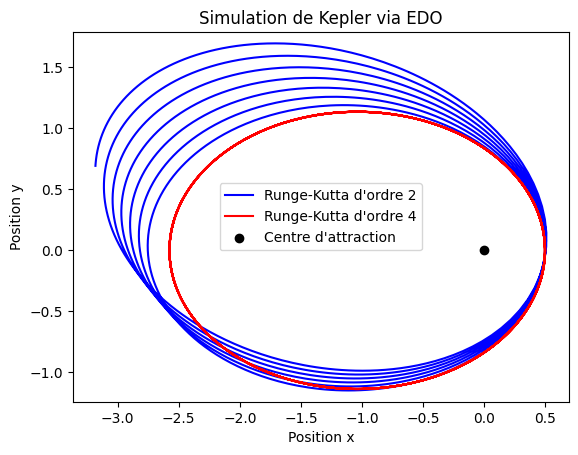

In [ ]:
M_soleil = 1
G_temp = 4*(np.pi)**2
t_min = 0.0
t_max = 15
h = 0.01
x0 = 0.5  # position astre initiale (x)
y0 = 0  # position astre initiale (y)
x_prime0 = 0  # vitesse astre initiale (x)
y_prime0 = 11.5  # vitesse astre initiale (y)
beta_RK = 0.5

xRK2, yRK2, t, u, v = fct_RK2_2D(x0, y0, x_prime0, y_prime0, t_min, t_max, h, beta_RK, k1, k2, l1, l2, G_temp, M_soleil)
xRK4, yRK4, t, u_4, v_4 = fct_RK4_2D(x0, y0, x_prime0, y_prime0, t_min, t_max, h, beta_RK, k1, k2, l1, l2, G_temp, M_soleil)

# Labels et légende
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.title("Simulation de Kepler via EDO")
plt.grid()
plt.axis("equal")  # Pour conserver les proportions réelles

plt.figure(1)
plt.plot(xRK2, yRK2, label="Runge-Kutta d'ordre 2", linestyle="-", color="b")
plt.plot(xRK4, yRK4, label="Runge-Kutta d'ordre 4", linestyle="-", color="r")

# Ajouter le centre d'attraction (astre central)
plt.scatter(0, 0, color="black", marker="o", label="Centre d'attraction")

# Labels et légende
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.title("Simulation de Kepler via EDO")
plt.legend()
plt.grid()
plt.axis("equal")  # Pour conserver les proportions réelles

plt.show()